In [1]:
from itertools import cycle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exp2_df = pd.read_csv("exp2.csv", header=0)

In [3]:
exp2_df = exp2_df.dropna(how="any")

In [4]:
exp2_df = exp2_df.rename(
    columns={
        "dataset": "dataset",
        "num_train": "train data",
        "data_augment": "data augment",
        "augment": "augment",
        "seed": "seed",
        "test_acc": "accuracy"
    }
)

In [5]:
exp2_df = exp2_df.astype({"accuracy": "float32"})

In [6]:
exp2_df["data augment"] = exp2_df["data augment"].replace("backtranslate", "BT")

In [7]:
exp2_df["augment"] = exp2_df["augment"].replace("adamix", "OoMMix")

In [8]:
sns.set_theme(context="paper", style="ticks", font_scale=1.5)

In [9]:
def f(df, ax):
    sns.barplot(x="data augment", y="accuracy", hue="augment", ci="sd", data=df, ax=ax, errwidth=3, capsize=.1)
    hatches = cycle(["///", "x", "O"])
    num_augment = len(df["data augment"].unique())
    for i, p in enumerate(ax.patches):
        if i % num_augment == 0:
            h = next(hatches)
        p.set_hatch(h)
    ax.legend(loc='best')

In [10]:
def adjust_range(df, axes):
    minv = df["accuracy"].min()
    maxv = df["accuracy"].max()
    for ax in axes:
        ax.set(ylim=(minv-0.3*(maxv-minv), maxv+0.3*(maxv-minv)))

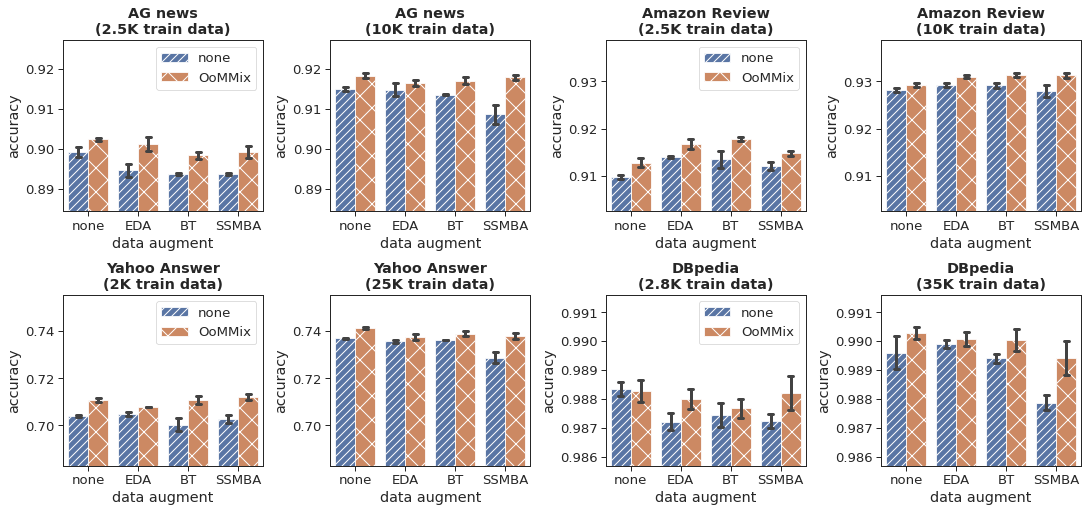

In [11]:
fit, axes = plt.subplots(figsize=(15, 7), nrows=2, ncols=4, constrained_layout=True)

f(exp2_df[(exp2_df["dataset"] == "ag_news") & (exp2_df["train data"] == 2500)], axes[0, 0])
f(exp2_df[(exp2_df["dataset"] == "ag_news") & (exp2_df["train data"] == 10000)], axes[0, 1])
f(exp2_df[(exp2_df["dataset"] == "amazon_review") & (exp2_df["train data"] == 2500)], axes[0, 2])
f(exp2_df[(exp2_df["dataset"] == "amazon_review") & (exp2_df["train data"] == 10000)], axes[0, 3])
f(exp2_df[(exp2_df["dataset"] == "yahoo_answer") & (exp2_df["train data"] == 2000)], axes[1, 0])
f(exp2_df[(exp2_df["dataset"] == "yahoo_answer") & (exp2_df["train data"] == 25000)], axes[1, 1])
f(exp2_df[(exp2_df["dataset"] == "dbpedia") & (exp2_df["train data"] == 2800)], axes[1, 2])
f(exp2_df[(exp2_df["dataset"] == "dbpedia") & (exp2_df["train data"] == 35000)], axes[1, 3])

axes[0, 0].set_title("AG news\n(2.5K train data)", fontweight='bold')
axes[0, 1].set_title("AG news\n(10K train data)", fontweight='bold')
axes[0, 2].set_title("Amazon Review\n(2.5K train data)", fontweight='bold')
axes[0, 3].set_title("Amazon Review\n(10K train data)", fontweight='bold')
axes[1, 0].set_title("Yahoo Answer\n(2K train data)", fontweight='bold')
axes[1, 1].set_title("Yahoo Answer\n(25K train data)", fontweight='bold')
axes[1, 2].set_title("DBpedia\n(2.8K train data)", fontweight='bold')
axes[1, 3].set_title("DBpedia\n(35K train data)", fontweight='bold')

adjust_range(exp2_df[(exp2_df["dataset"] == "ag_news")], [axes[0, 0], axes[0, 1]])
adjust_range(exp2_df[(exp2_df["dataset"] == "amazon_review")], [axes[0, 2], axes[0, 3]])
adjust_range(exp2_df[(exp2_df["dataset"] == "yahoo_answer")], [axes[1, 0], axes[1, 1]])
adjust_range(exp2_df[(exp2_df["dataset"] == "dbpedia")], [axes[1, 2], axes[1, 3]])


axes[0, 1].legend([],[], frameon=False)
axes[0, 3].legend([],[], frameon=False)
axes[1, 1].legend([],[], frameon=False)
axes[1, 3].legend([],[], frameon=False)

#plt.savefig("exp2.png", dpi=500)